In [2]:
# this will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load Data

In [4]:
data = pd.read_csv('yelp.csv')

In [6]:
#Check the dataframe
data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
stars,10000.0,3.7775,1.214636,1.0,3.0,4.0,5.0,5.0
cool,10000.0,0.8768,2.067861,0.0,0.0,0.0,1.0,77.0
useful,10000.0,1.4093,2.336647,0.0,0.0,1.0,2.0,76.0
funny,10000.0,0.7013,1.907942,0.0,0.0,0.0,1.0,57.0


### Create a new column called "text_length" which is the number of words in the text column.

In [10]:
data['text_length'] = data['text'].apply(len)

## Exploratory Data Analysis

In [11]:
sns.set_style('white')

**Use the FacetGrid from seaborn library to create a grid of 5 histograms of text length based off of the star ratings.** 

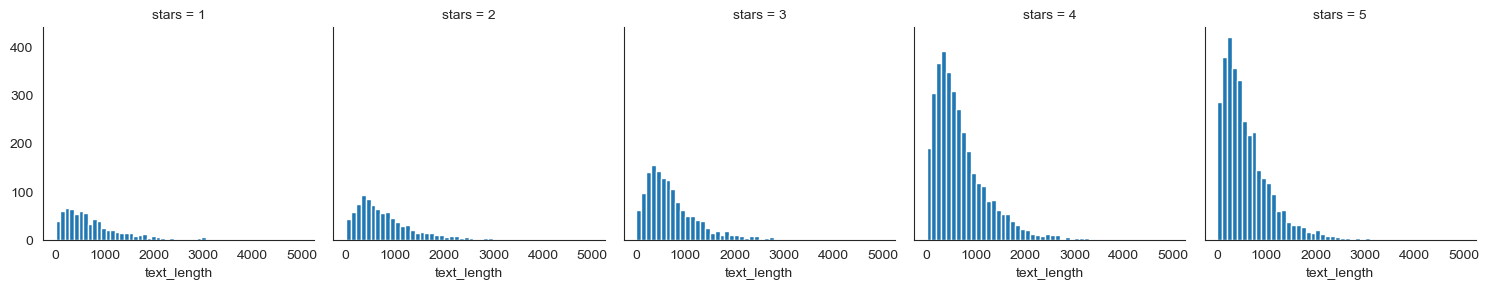

In [12]:
g = sns.FacetGrid(data,col='stars')
g.map(plt.hist,'text_length',bins=50)

<AxesSubplot:xlabel='stars', ylabel='text_length'>

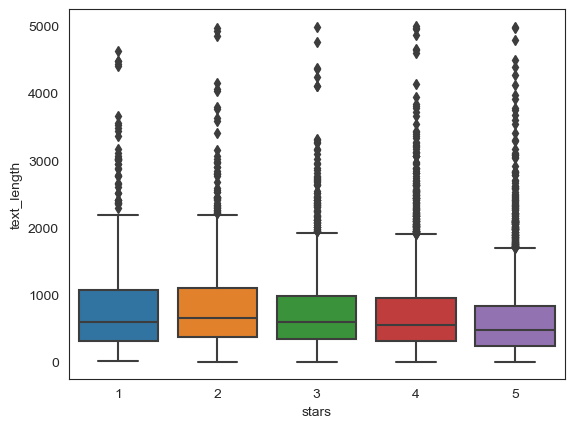

In [14]:
sns.boxplot(x='stars',y='text_length',data=data)

## Create a countplot of the number of occurrences for each star rating

<AxesSubplot:xlabel='stars', ylabel='count'>

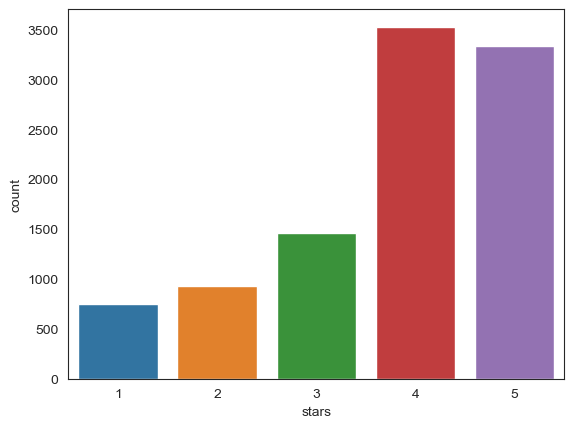

In [16]:
sns.countplot(x='stars',data=data)

## Use groupby to get the mean values of the numerical columns

In [18]:
stars = data.groupby('stars').mean()
stars

,cool,useful,funny,text_length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [20]:
stars.corr() 

,cool,useful,funny,text_length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text_length,-0.857664,0.699881,0.843461,1.000000


<AxesSubplot:>

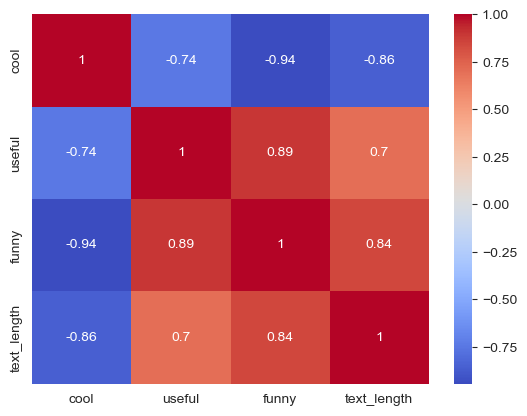

In [21]:
#create a heatmap based off the .corr() dataframe
sns.heatmap(stars.corr(),cmap='coolwarm',annot=True)

## NLP Classification Task

To make things easier, I will go ahead and grab reviews that were either 1 star or 5 star reviews

**Create a dataframe called data_class that contains the columns of dataframe but for only the 1 or 5 star reviews**

In [22]:
data_class = data[(data['stars']==1) | (data['stars']==5)]

In [23]:
data_class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4086 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  4086 non-null   object
 1   date         4086 non-null   object
 2   review_id    4086 non-null   object
 3   stars        4086 non-null   int64 
 4   text         4086 non-null   object
 5   type         4086 non-null   object
 6   user_id      4086 non-null   object
 7   cool         4086 non-null   int64 
 8   useful       4086 non-null   int64 
 9   funny        4086 non-null   int64 
 10  text_length  4086 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 383.1+ KB


- We now have less data i.e 4086 entries in the new dataframe

**Create two objects X and y. X will be the 'text column of data_class and y will be the 'stars' column of the data_class. i.e features and target/labels**

In [24]:
X = data_class['text']
y = data_class['stars']

**Import CountVectorizer and create a CountVectorizer object.

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

**Use the fit_transform method on the CountVectorizer object and pass in the X (the 'text' column). Save this result by overwriting X

In [27]:
X = cv.fit_transform(X)

### Train Test Split

Split the data into training and testing data i.e X_train, X_test, y_train, y_test
In this case I am using test size=0.3 and random_state=101

In [29]:
from sklearn.model_selection import train_test_split


In [30]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=101)

### Training a Model

**Import multinomialNB and create an instance of the estimator and call is nb**

In [32]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

**Now fit nb using training data**

In [33]:
nb.fit(X_train,y_train)

MultinomialNB()

### Predictions and Evaluations

In [34]:
predictions = nb.predict(X_test)

**Create a confusion matrix and classification report using these predictions and y_test**

In [36]:
from sklearn.metrics import confusion_matrix, classification_report


In [39]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test, predictions))

[[159  69]
 [ 22 976]]


              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



**What happens when we try to include TF-IDF to this process using a pipeline**

### Using Text Processing
**import TfidfTransformer from sklearn**

In [41]:
from sklearn.feature_extraction.text import TfidfTransformer

**Import Pipeline from sklearn**

In [43]:
from sklearn.pipeline import Pipeline

**create pipeline with the following steps**

In [46]:
pipe = Pipeline([('bow',CountVectorizer()),
                 ('tfidf',TfidfTransformer()),
                  ('model',MultinomialNB())])

### Using the Pipeline

This pipeline has all the pre-process steps in it already, meaning we will need to re-split the original data. (Note that X was overwritten as the CountVectorized version. All we need is just the text

### Train Test Split

In [48]:
X = data_class['text']
y = data_class['stars']

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=101)

**Now fit the pipeline to the training data. We cannot use the same training data as last time because that data has already been vectorized. We need to just pass in the text and labels**

In [50]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('model', MultinomialNB())])

## Predictions and Evaluation

**Now use the pipeline to predict from the X_test and create a classification report and confusion matrix**

In [51]:
new_predictions = pipe.predict(X_test)

In [52]:
print(confusion_matrix(y_test,new_predictions))
print('\n')
print(classification_report(y_test, new_predictions))

[[  0 228]
 [  0 998]]


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



C:\Users\omask\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\omask\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\omask\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Tfidf makes things worse** Using custom analizer may help